<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Create-DF" data-toc-modified-id="Create-DF-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Create DF</a></span></li></ul></li><li><span><a href="#Part-1-Data-Cleaning" data-toc-modified-id="Part-1-Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 1 Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Removing-Stop-words" data-toc-modified-id="Removing-Stop-words-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Removing Stop words</a></span></li><li><span><a href="#Part-3-:-Zipf’s-Law,-data-visualisation" data-toc-modified-id="Part-3-:-Zipf’s-Law,-data-visualisation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Part 3 : Zipf’s Law, data visualisation</a></span></li><li><span><a href="#Part-4:-Count-vectorizer,-confusion-matrix" data-toc-modified-id="Part-4:-Count-vectorizer,-confusion-matrix-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Part 4: Count vectorizer, confusion matrix</a></span><ul class="toc-item"><li><span><a href="#Importance-of-Stop-Words" data-toc-modified-id="Importance-of-Stop-Words-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Importance of Stop Words</a></span></li><li><span><a href="#Which-N-GRAM-is-best-?" data-toc-modified-id="Which-N-GRAM-is-best-?-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Which N-GRAM is best ?</a></span></li></ul></li><li><span><a href="#Part-5:-Tfidf-vectorizer,-model-comparison,-lexical-approach" data-toc-modified-id="Part-5:-Tfidf-vectorizer,-model-comparison,-lexical-approach-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Part 5: Tfidf vectorizer, model comparison, lexical approach</a></span><ul class="toc-item"><li><span><a href="#Tfidf-vs-Count-Vectorizer" data-toc-modified-id="Tfidf-vs-Count-Vectorizer-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Tfidf vs Count Vectorizer</a></span></li><li><span><a href="#Testing-Multiple-Algorithms" data-toc-modified-id="Testing-Multiple-Algorithms-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Testing Multiple Algorithms</a></span></li><li><span><a href="#Voting-Classifier" data-toc-modified-id="Voting-Classifier-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Voting Classifier</a></span></li><li><span><a href="#Save-Best-classifier" data-toc-modified-id="Save-Best-classifier-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Save Best classifier</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Submission</a></span></li><li><span><a href="#“positive-rate-CDF”-and-“positive-frequency-percent-CDF”" data-toc-modified-id="“positive-rate-CDF”-and-“positive-frequency-percent-CDF”-2.5.6"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span>“positive rate CDF” and “positive frequency percent CDF”</a></span></li></ul></li><li><span><a href="#Part-6:-Doc2Vec" data-toc-modified-id="Part-6:-Doc2Vec-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Part 6: Doc2Vec</a></span></li></ul></li></ul></div>

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

%config InlineBackend.figure_format = 'retina'
import re
from nltk.tokenize import WordPunctTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [52]:
data_folder = './twitter-datasets/'
# data_folder = './'

# Reading the data
# positive_path = os.path.join(data_folder, 'train_pos.txt')
# negative_path = os.path.join(data_folder, 'train_neg.txt')

positive_path = os.path.join(data_folder, 'train_pos_full.txt')
negative_path = os.path.join(data_folder, 'train_neg_full.txt')
submission_path = os.path.join(data_folder, 'test_data.txt')

In [53]:
lines_positive = [line.rstrip('\n') for line in open(positive_path)]
lines_negative = [line.rstrip('\n') for line in open(negative_path)]
lines_submission = [line.rstrip('\n') for line in open(submission_path)]

# Data preparation

## Create DF

In [4]:
# Create dataFrame from positive tweets and give them value 1 as a sentiment
data_pos = pd.DataFrame({
    "tweets": lines_positive,
    "sentiment": np.ones(len(lines_positive))
})

# Create dataFrame from negative tweets and give them value 0 as a sentiment
data_neg = pd.DataFrame({
    "tweets": lines_negative,
    "sentiment": np.zeros(len(lines_negative))
})
# Concat both of them
data = pd.concat([data_pos, data_neg],
                 axis=0).reset_index().drop(columns=['index'])

# Shuffle everything so that we don't have all the positives in one cluster and all the negatives in another
data = data.sample(frac=1).reset_index(drop=True)


data.head()

,tweets,sentiment
0,today was such a good day,1.0
1,"<user> hi , do you want #freealbumexok ? go fo...",1.0
2,<user> when does our first post have ta be pos...,0.0
3,birthday is in exactly two months from today !...,1.0
4,women's wolverine wolverine steel-toe electric...,0.0


# Part 1 Data Cleaning

## Data Exploration

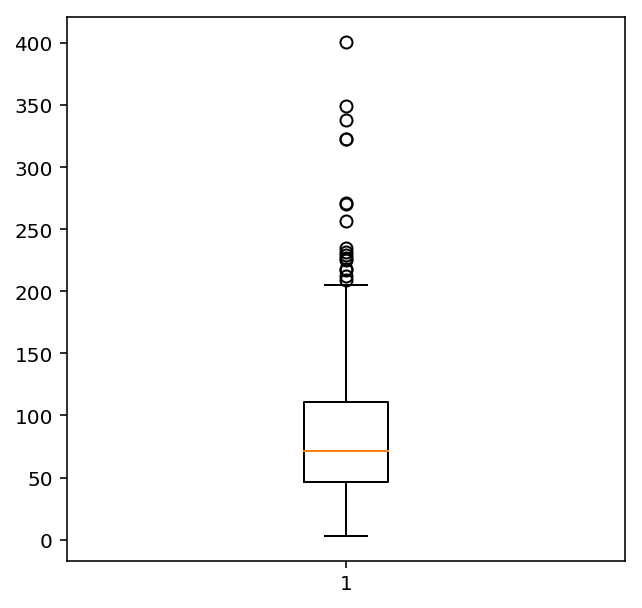

In [5]:
data['pre_clean_len'] = [len(t) for t in data.tweets]
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(data.pre_clean_len)
plt.show()

In [6]:
tok = WordPunctTokenizer()

negations_dic = {
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "can't": "can not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not"
}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')


def tweet_cleaner(text):
    #     remove digits
    text = ''.join([i for i in text if not i.isdigit()])
    lower_case = text.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()],
                                  lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [7]:
data['tweets'].replace(
    regex=True, inplace=True, to_replace=r'<.*?>', value=r'')
data['tweets'] = data['tweets'].apply(lambda x: tweet_cleaner(x))

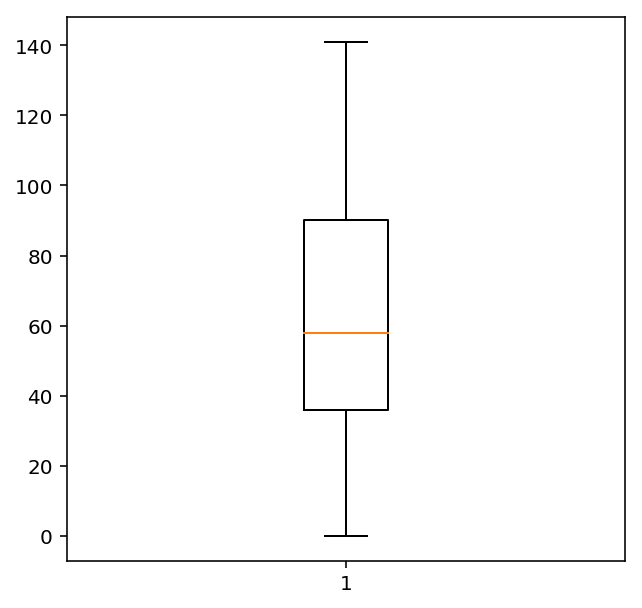

In [8]:
data['post_clean_len'] = [len(t) for t in data.tweets]
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(data.post_clean_len)
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(data.tweets)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
neg_doc_matrix = cvec.transform(data[data.sentiment == 0].tweets)
pos_doc_matrix = cvec.transform(data[data.sentiment == 1].tweets)
neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg, pos],
                            columns=cvec.get_feature_names()).transpose()
term_freq_df.columns = ['neg', 'pos']

In [11]:
term_freq_df['total'] = term_freq_df['neg'] + term_freq_df['pos']
term_freq_df = term_freq_df.sort_values(by='total', ascending=False)
term_freq_df.head()

,neg,pos,total
the,435098,327256,762354
to,358333,346819,705152
you,216407,437566,653973
and,243318,213951,457269
my,198707,202952,401659


Text(0.5,1,'Top 500 tokens in tweets')

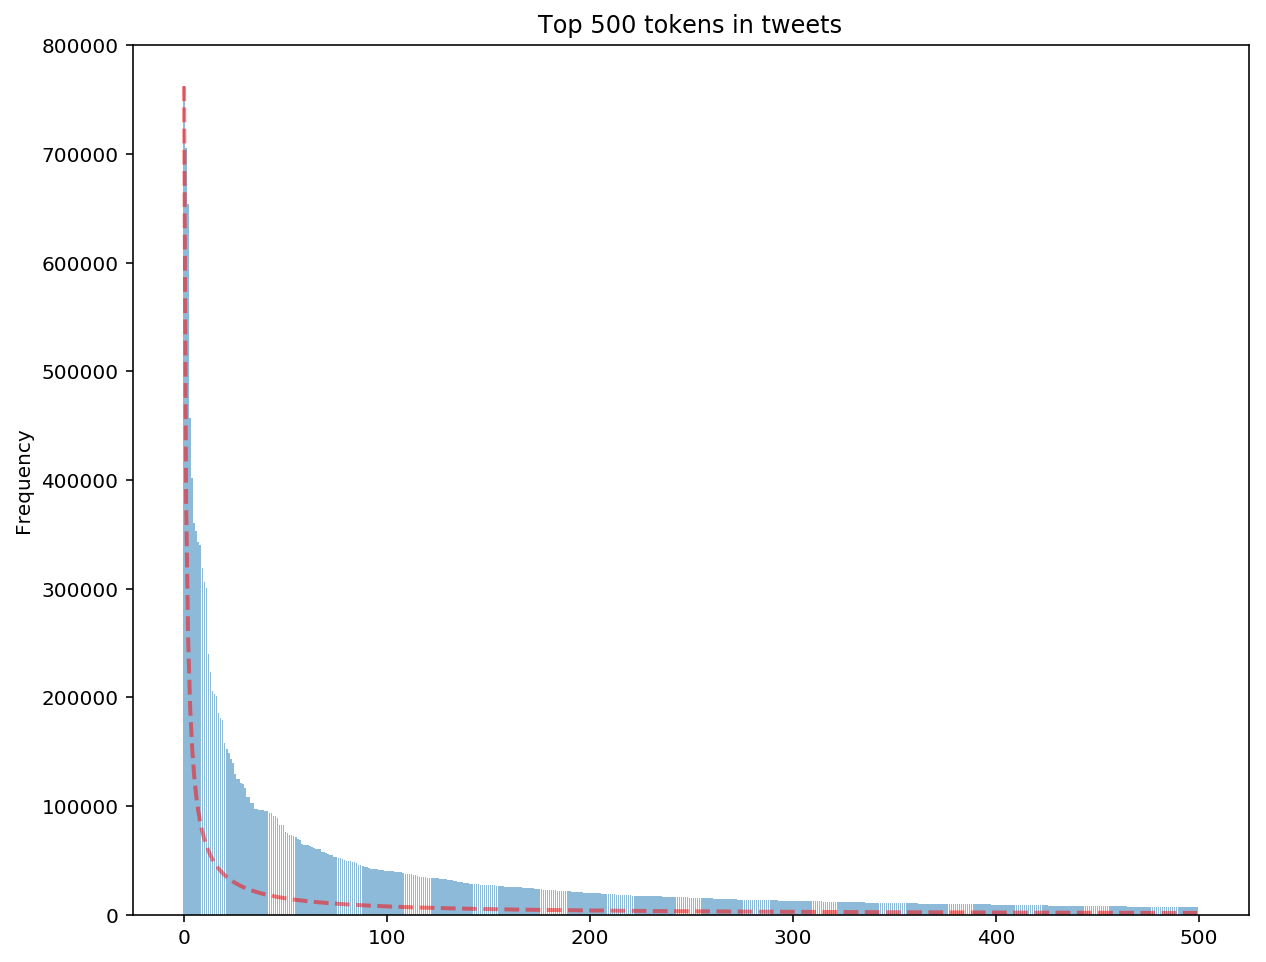

In [12]:
y_pos = np.arange(500)
plt.figure(figsize=(10, 8))
s = 1
expected_zipf = [
    term_freq_df.sort_values(by='total', ascending=False)['total'][0] / (i + 1)
    **s for i in y_pos
]
plt.bar(
    y_pos,
    term_freq_df.sort_values(by='total', ascending=False)['total'][:500],
    align='center',
    alpha=0.5)
plt.plot(
    y_pos, expected_zipf, color='r', linestyle='--', linewidth=2, alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

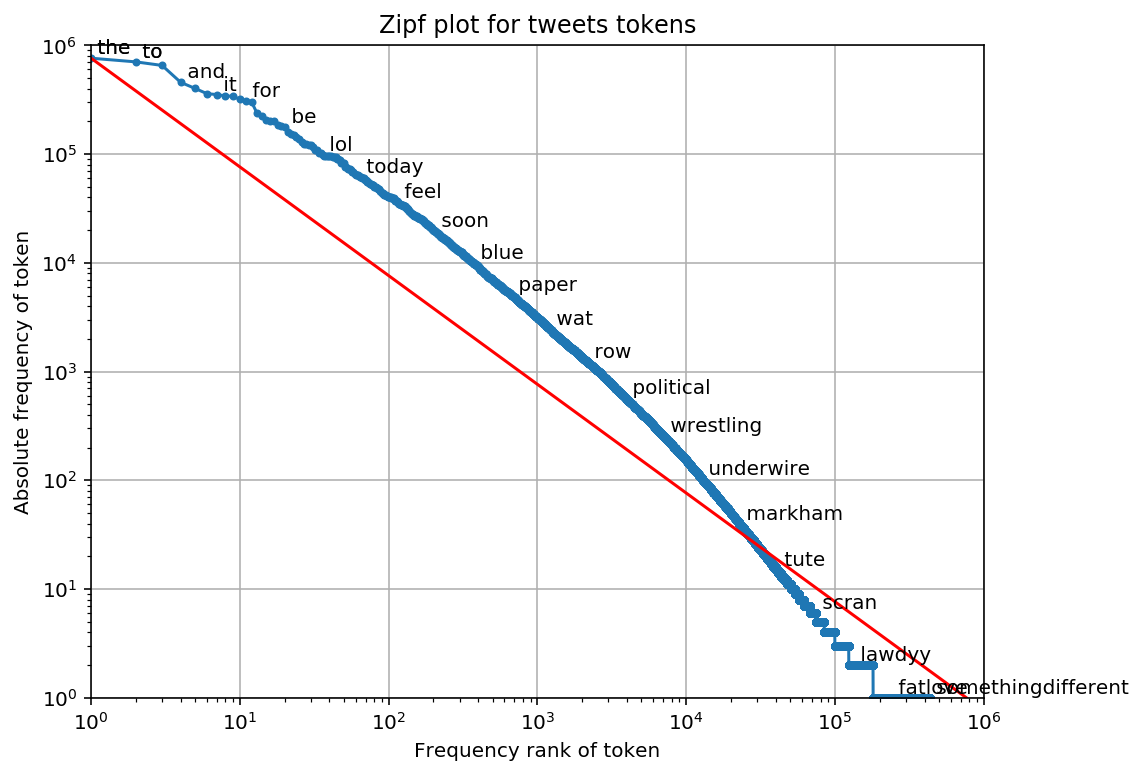

In [13]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts) + 1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8, 6))
plt.ylim(1, 10**6)
plt.xlim(1, 10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1, frequencies[0]], [frequencies[0], 1], color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts) - 2), 25).astype(int)):
    dummy = text(
        ranks[n],
        frequencies[n],
        " " + tokens[indices[n]],
        verticalalignment="bottom",
        horizontalalignment="left")

## Removing Stop words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', max_features=10000)
cvec.fit(data.tweets)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
document_matrix = cvec.transform(data.tweets)

In [16]:
neg_doc_matrix = cvec.transform(data[data.sentiment == 0].tweets)
pos_doc_matrix = cvec.transform(data[data.sentiment == 1].tweets)
neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg, pos],
                             columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['neg', 'pos']
term_freq_df2['total'] = term_freq_df2['neg'] + term_freq_df2['pos']
term_freq_df2 = term_freq_df2.sort_values(by='total', ascending=False)
term_freq_df2.head()

,neg,pos,total
just,67740,85102,152842
rt,56383,86975,143358
love,33370,91448,124818
like,54791,65821,120612
frame,102357,101,102458


## Part 3 : Zipf’s Law, data visualisation

Text(0.5,1,'Top 50 tokens in negative tweets')

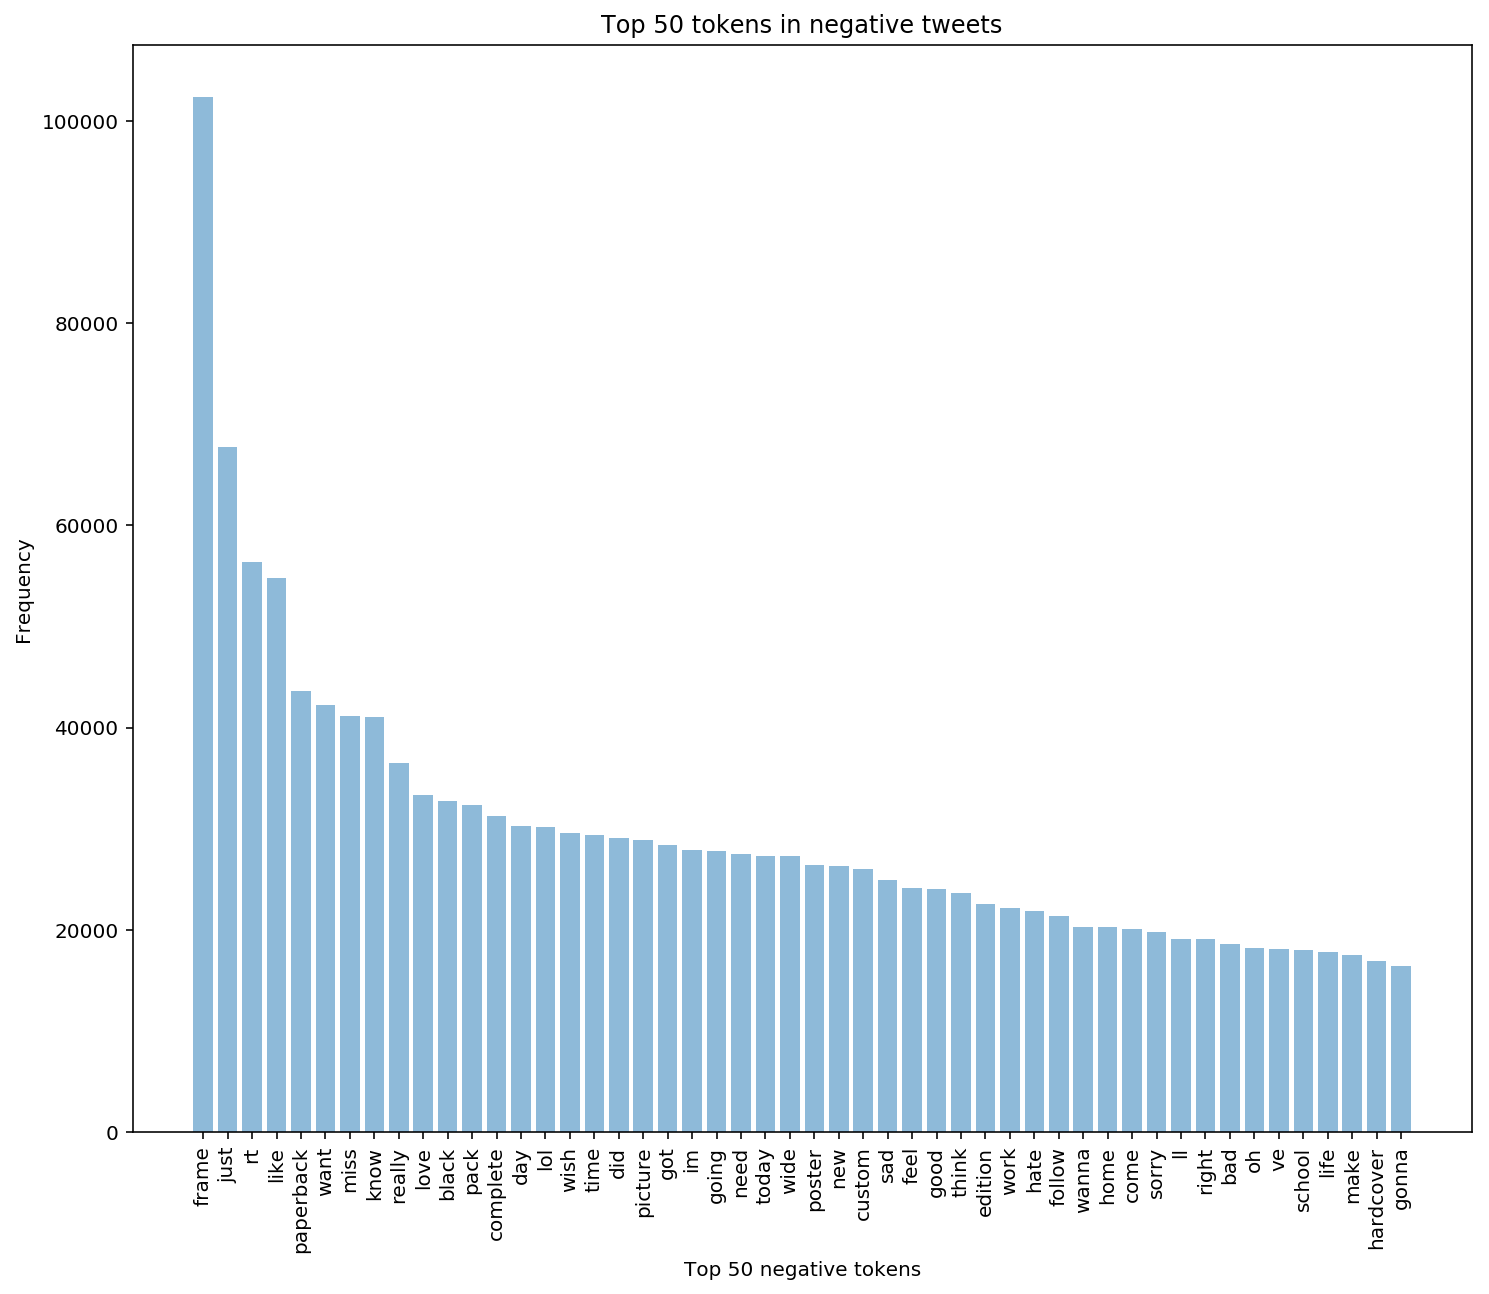

In [17]:
y_pos = np.arange(50)
plt.figure(figsize=(12, 10))
plt.bar(
    y_pos,
    term_freq_df2.sort_values(by='neg', ascending=False)['neg'][:50],
    align='center',
    alpha=0.5)
plt.xticks(
    y_pos,
    term_freq_df2.sort_values(by='neg', ascending=False)['neg'][:50].index,
    rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5,1,'Top 50 tokens in positive tweets')

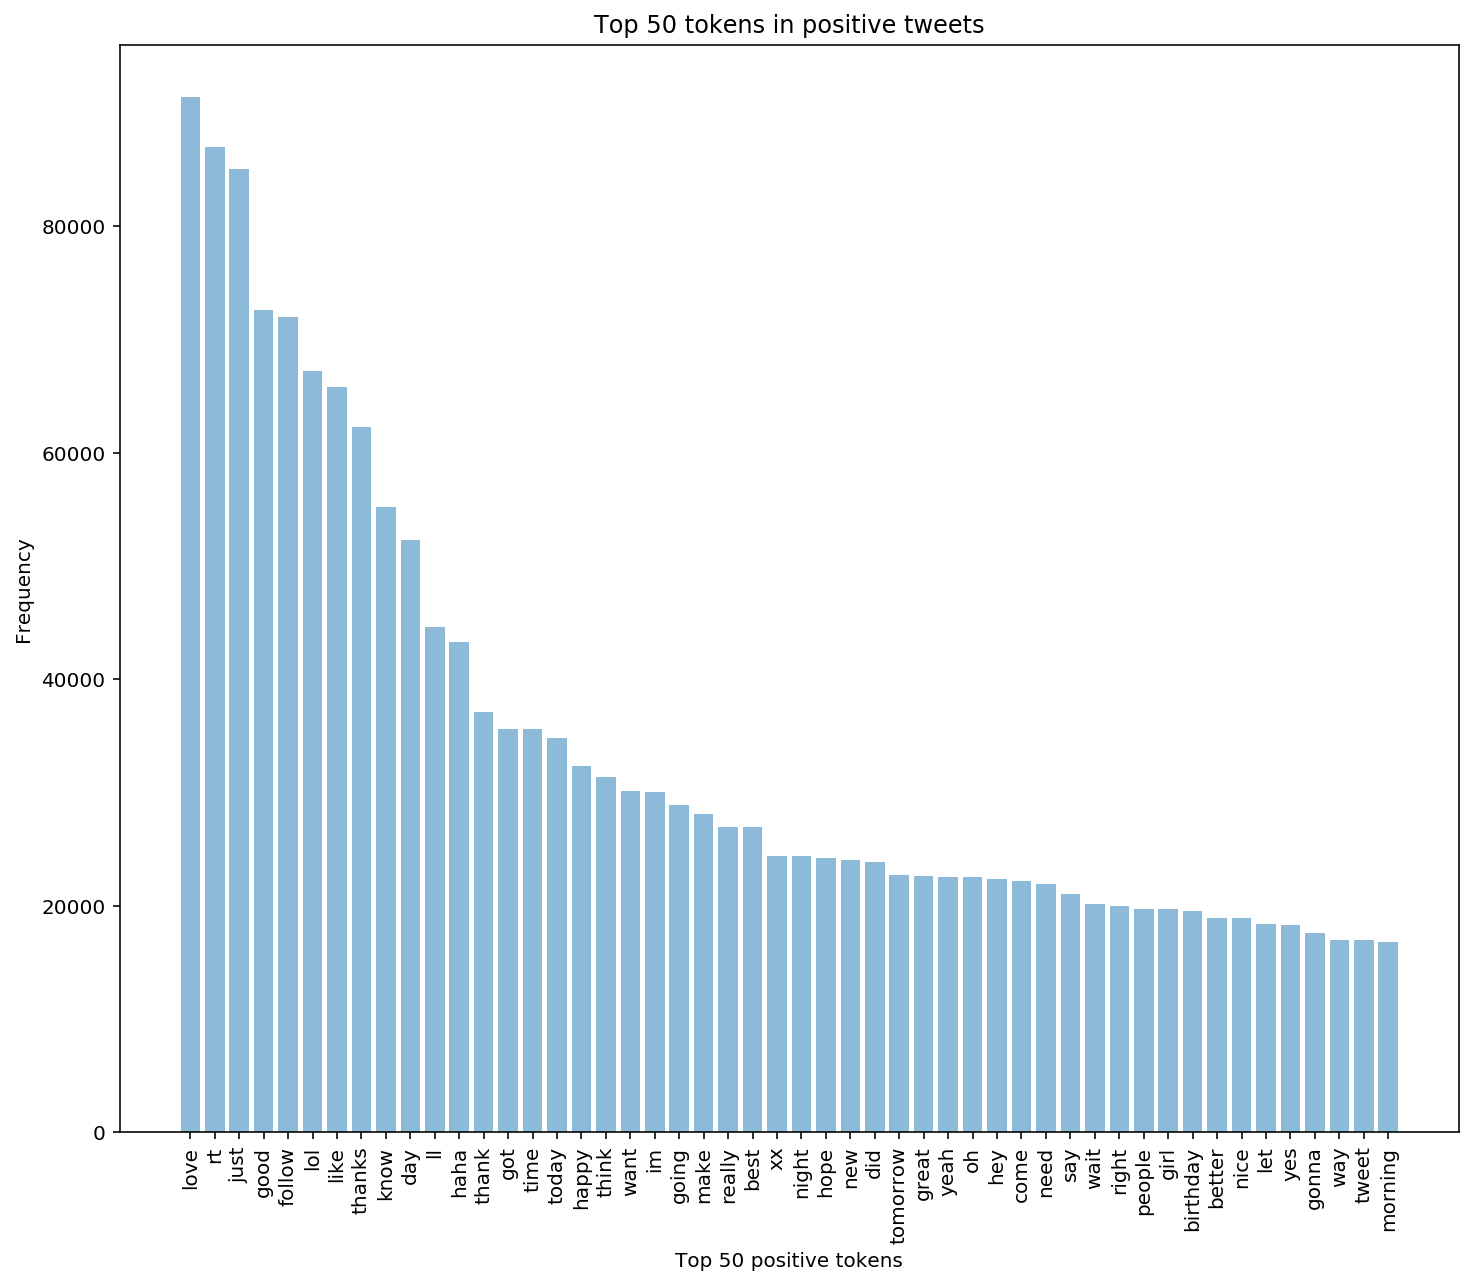

In [18]:
y_pos = np.arange(50)
plt.figure(figsize=(12, 10))
plt.bar(
    y_pos,
    term_freq_df2.sort_values(by='pos', ascending=False)['pos'][:50],
    align='center',
    alpha=0.5)
plt.xticks(
    y_pos,
    term_freq_df2.sort_values(by='pos', ascending=False)['pos'][:50].index,
    rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5,1,'Negative Frequency vs Positive Frequency')

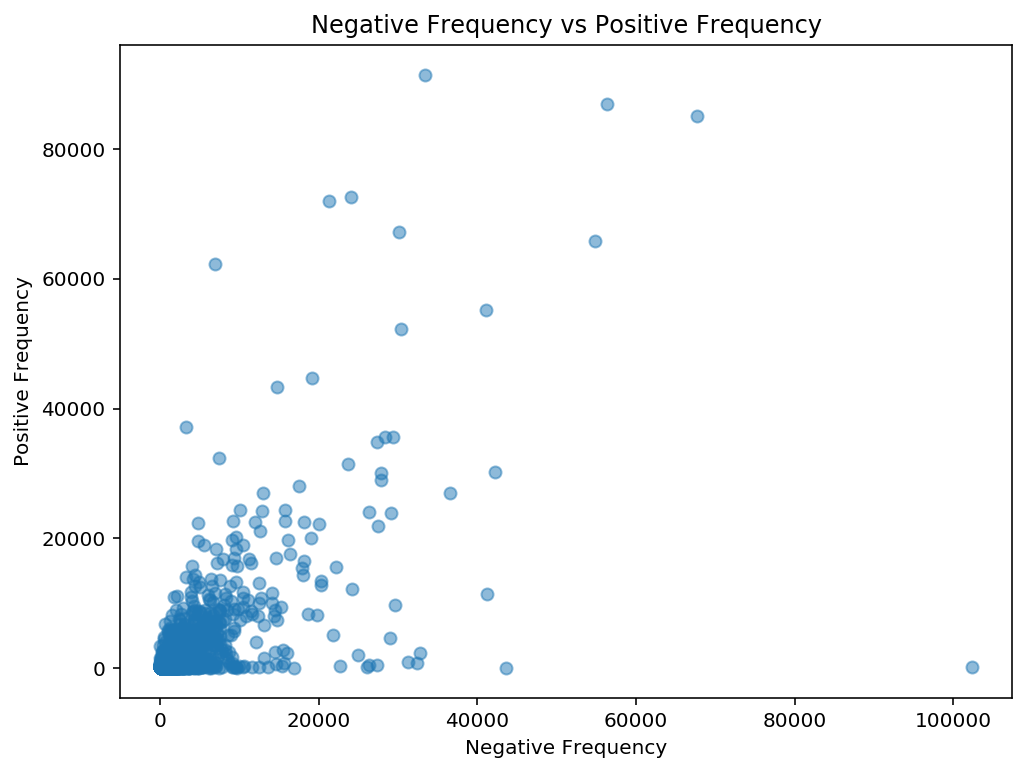

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 6))
ax = sns.regplot(
    x="neg",
    y="pos",
    fit_reg=False,
    scatter_kws={'alpha': 0.5},
    data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

we cannot see meaningful relations between negative and positive frequency.

In [20]:
term_freq_df2['pos_rate'] = term_freq_df2['pos'] * 1. / term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,neg,pos,total,pos_rate
wumbo,0,676,676,1.000000
youcangetmajorpointsif,0,405,405,1.000000
iswagtumblr,0,312,312,1.000000
aintlovecrazy,0,208,208,1.000000
wumboing,0,169,169,1.000000
adoptakuola,0,413,413,1.000000
christianpickuplines,0,299,299,1.000000
wumbology,0,168,168,1.000000
harrypotterchatuplines,2,617,619,0.996769
yougetmajorpoints,2,559,561,0.996435


pos_freq_pct is just the frequency scaled over the total sum of the frequency, the rank of pos_freq_pct is exactly same as just the positive frequency.

In [21]:
term_freq_df2[
    'pos_freq_pct'] = term_freq_df2['pos'] * 1. / term_freq_df2['pos'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,neg,pos,total,pos_rate,pos_freq_pct
love,33370,91448,124818,0.732651,0.014507
rt,56383,86975,143358,0.606698,0.013798
just,67740,85102,152842,0.556797,0.013500
good,24071,72585,96656,0.750962,0.011515
follow,21328,71957,93285,0.771367,0.011415
lol,30127,67219,97346,0.690516,0.010663
like,54791,65821,120612,0.545725,0.010442
thanks,6896,62259,69155,0.900282,0.009877
know,41095,55185,96280,0.573172,0.008754
day,30320,52329,82649,0.633147,0.008301


Using the harmonic mean on pos_freq_pct

In [22]:
from scipy.stats import hmean
term_freq_df2['pos_hmean'] = term_freq_df2.apply(
    lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']]) if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0),
    axis=1)

term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,neg,pos,total,pos_rate,pos_freq_pct,pos_hmean
love,33370,91448,124818,0.732651,0.014507,0.028451
rt,56383,86975,143358,0.606698,0.013798,0.026981
just,67740,85102,152842,0.556797,0.013500,0.026362
good,24071,72585,96656,0.750962,0.011515,0.022682
follow,21328,71957,93285,0.771367,0.011415,0.022497
lol,30127,67219,97346,0.690516,0.010663,0.021003
like,54791,65821,120612,0.545725,0.010442,0.020491
thanks,6896,62259,69155,0.900282,0.009877,0.019539
know,41095,55185,96280,0.573172,0.008754,0.017245
day,30320,52329,82649,0.633147,0.008301,0.016388


In [23]:
from scipy.stats import norm


def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())


term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean(
    [term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

,neg,pos,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
thank,3249,37139,40388,0.919555,0.005892,0.011708,0.993216,1.000000,0.996596
thanks,6896,62259,69155,0.900282,0.009877,0.019539,0.991432,1.000000,0.995698
smile,1703,10945,12648,0.865354,0.001736,0.003466,0.987136,0.999624,0.993341
awesome,2107,11054,13161,0.839906,0.001754,0.003500,0.982931,0.999670,0.991230
hey,4797,22385,27182,0.823523,0.003551,0.007072,0.979644,1.000000,0.989717
happy,7401,32331,39732,0.813727,0.005129,0.010194,0.977432,1.000000,0.988587
following,3206,13956,17162,0.813192,0.002214,0.004416,0.977306,0.999993,0.988520
glad,1516,8109,9625,0.842494,0.001286,0.002569,0.983407,0.992724,0.988044
birthday,4704,19540,24244,0.805973,0.003100,0.006176,0.975542,1.000000,0.987619
excited,2009,8871,10880,0.815349,0.001407,0.002810,0.977812,0.996452,0.987044


In [24]:
term_freq_df2['neg_rate'] = term_freq_df2['neg'] * 1. / term_freq_df2['total']
term_freq_df2[
    'neg_freq_pct'] = term_freq_df2['neg'] * 1. / term_freq_df2['neg'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(
    lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']]) if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 else 0),
    axis=1)

term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean(
    [term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,neg,pos,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
paperback,43650,11,43661,0.000252,0.000002,0.000003,0.058014,0.419820,0.101941,0.999748,0.005378,0.010698,0.941986,1.000000,0.970126
hardcover,16884,7,16891,0.000414,0.000001,0.000002,0.058097,0.419309,0.102054,0.999586,0.002080,0.004152,0.941903,1.000000,0.970082
frame,102357,101,102458,0.000986,0.000016,0.000032,0.058389,0.431345,0.102855,0.999014,0.012611,0.024907,0.941611,1.000000,0.969927
custom,26018,83,26101,0.003180,0.000013,0.000026,0.059522,0.429035,0.104541,0.996820,0.003206,0.006390,0.940478,1.000000,0.969326
ounce,9634,42,9676,0.004341,0.000007,0.000013,0.060128,0.423783,0.105314,0.995659,0.001187,0.002371,0.939872,0.999519,0.968778
audio,12423,103,12526,0.008223,0.000016,0.000033,0.062191,0.431602,0.108717,0.991777,0.001531,0.003056,0.937809,0.999993,0.967903
edition,22610,264,22874,0.011541,0.000042,0.000083,0.063998,0.452362,0.112132,0.988459,0.002786,0.005556,0.936002,1.000000,0.966943
wood,13568,171,13739,0.012446,0.000027,0.000054,0.064498,0.440351,0.112516,0.987554,0.001672,0.003338,0.935502,0.999999,0.966676
gb,11511,148,11659,0.012694,0.000023,0.000047,0.064635,0.437388,0.112627,0.987306,0.001418,0.002832,0.935365,0.999969,0.966589
wide,27325,378,27703,0.013645,0.000060,0.000119,0.065164,0.467144,0.114374,0.986355,0.003367,0.006710,0.934836,1.000000,0.966320


Text(0.5,1,'neg_hmean vs pos_hmean')

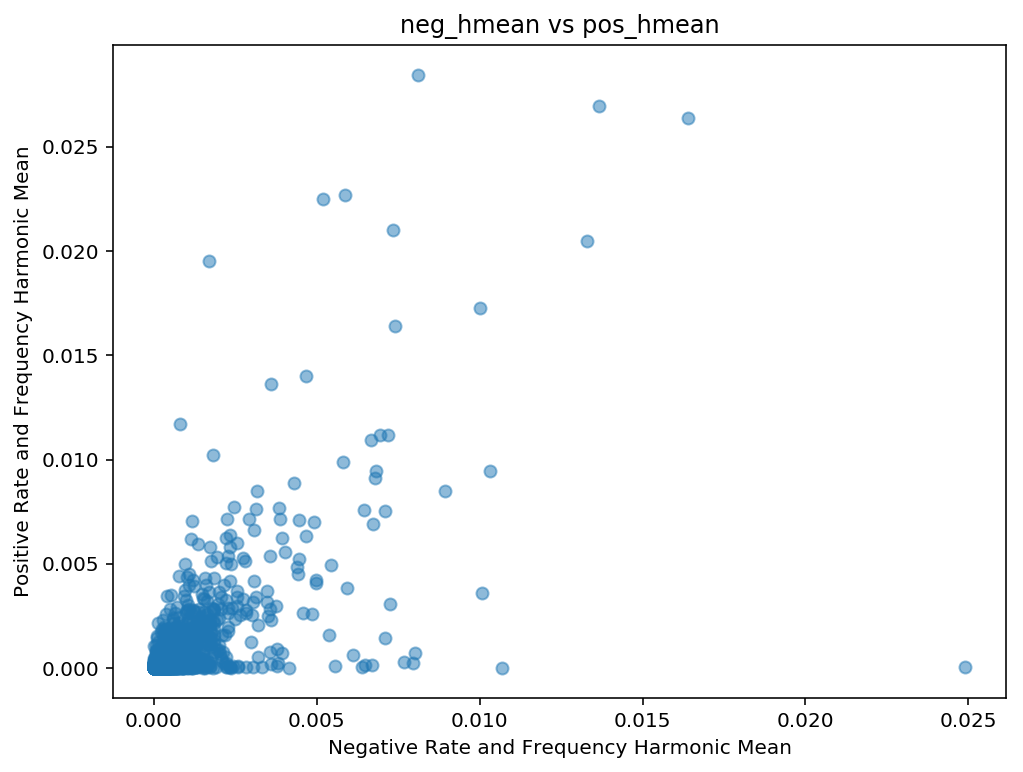

In [25]:
plt.figure(figsize=(8, 6))
ax = sns.regplot(
    x="neg_hmean",
    y="pos_hmean",
    fit_reg=False,
    scatter_kws={'alpha': 0.5},
    data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5,1,'neg_normcdf_hmean vs pos_normcdf_hmean')

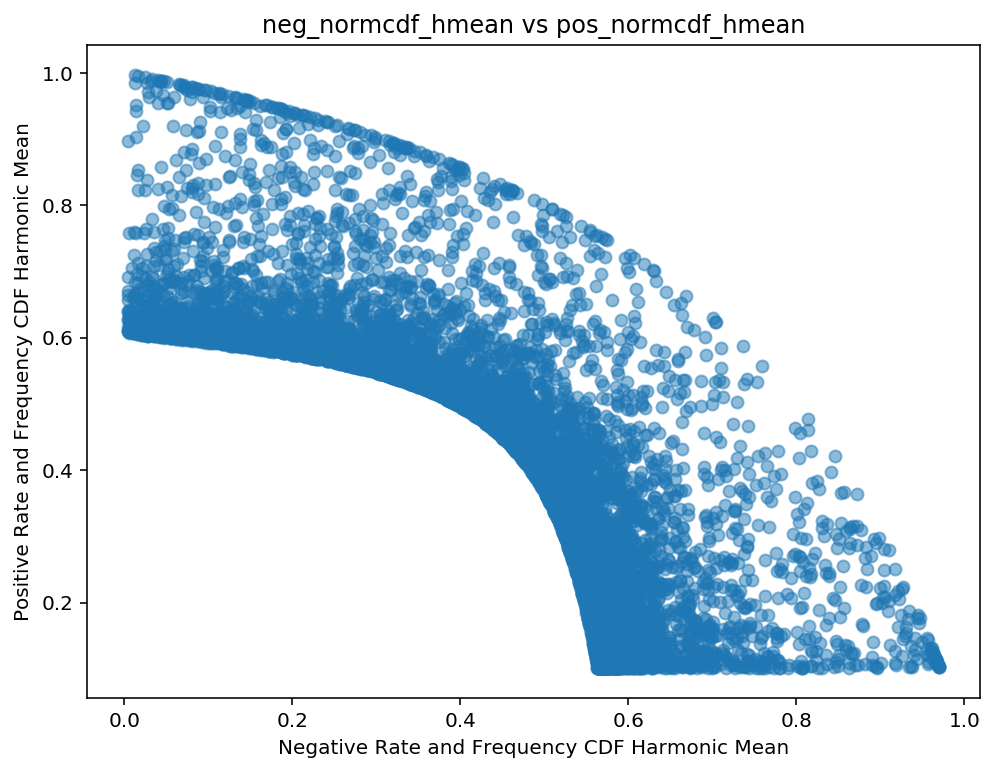

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.regplot(
    x="neg_normcdf_hmean",
    y="pos_normcdf_hmean",
    fit_reg=False,
    scatter_kws={'alpha': 0.5},
    data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [27]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(
    palette='Inferno256',
    low=min(term_freq_df2.pos_normcdf_hmean),
    high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle(
    'neg_normcdf_hmean',
    'pos_normcdf_hmean',
    size=5,
    alpha=0.3,
    source=term_freq_df2,
    color={
        'field': 'pos_normcdf_hmean',
        'transform': color_mapper
    })
hover = HoverTool(tooltips=[('token', '@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

## Part 4: Count vectorizer, confusion matrix

### Importance of Stop Words

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

In [29]:
x = data.tweets
y = data.sentiment
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(
    x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(
    x_validation_and_test,
    y_validation_and_test,
    test_size=.5,
    random_state=SEED)
print(
    "Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive"
    .format(
        len(x_train), (len(x_train[y_train == 0]) / (len(x_train) * 1.)) * 100,
        (len(x_train[y_train == 1]) / (len(x_train) * 1.)) * 100))
print(
    "Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive"
    .format(
        len(x_validation), (len(x_validation[y_validation == 0]) /
                            (len(x_validation) * 1.)) * 100,
        (len(x_validation[y_validation == 1]) /
         (len(x_validation) * 1.)) * 100))
print(
    "Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".
    format(
        len(x_test), (len(x_test[y_test == 0]) / (len(x_test) * 1.)) * 100,
        (len(x_test[y_test == 1]) / (len(x_test) * 1.)) * 100))

Train set has total 2450000 entries with 50.00% negative, 50.00% positive
Validation set has total 25000 entries with 49.76% negative, 50.24% positive
Test set has total 25000 entries with 50.34% negative, 49.66% positive


In [30]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):

    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy * 100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-" * 80)
    return accuracy, train_test_time


cvec = CountVectorizer()
lr = LogisticRegression()

# Number of words used from the dictionary by the CountVectorizer
n_features = np.arange(10000, 100001, 10000)


def nfeature_accuracy_checker(vectorizer=cvec,
                              n_features=n_features,
                              stop_words=None,
                              ngram_range=(1, 1),
                              classifier=lr):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(
            stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([('vectorizer', vectorizer),
                                     ('classifier', classifier)])
        print("Validation result for {} features".format(n))
        nfeature_accuracy, tt_time = accuracy_summary(
            checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n, nfeature_accuracy, tt_time))
    return result

In [31]:
from sklearn.feature_extraction import text
a = frozenset(
    list(
        term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
my_stop_words = frozenset(
    list(
        term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
set(a).issubset(set(b))

True

In [32]:
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')
print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

print("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 79.60%
train and test time: 125.27s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 80.32%
train and test time: 129.53s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 80.52%
train and test time: 127.57s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 80.62%
train and test time: 116.77s
--------------------------------------------------------------------------------
Validation res

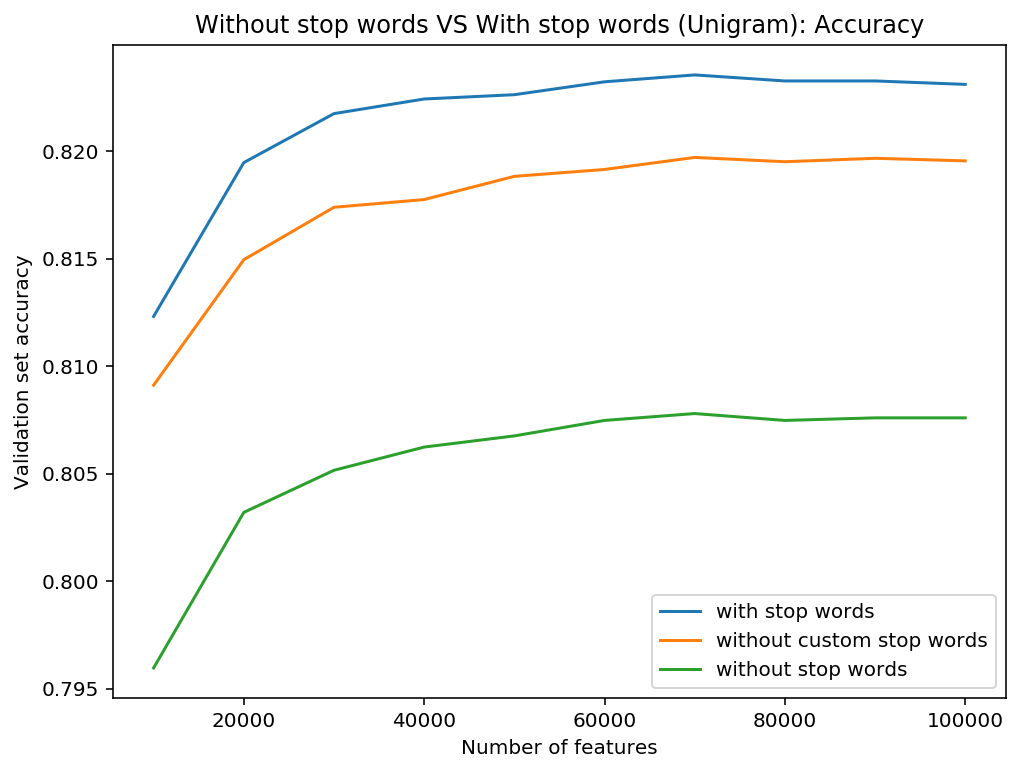

In [33]:
nfeatures_plot_ug = pd.DataFrame(
    feature_result_ug,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(
    feature_result_wocsw,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(
    feature_result_wosw,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])

# plot
plt.figure(figsize=(8, 6))
plt.plot(
    nfeatures_plot_ug.nfeatures,
    nfeatures_plot_ug.validation_accuracy,
    label='with stop words')
plt.plot(
    nfeatures_plot_ug_wocsw.nfeatures,
    nfeatures_plot_ug_wocsw.validation_accuracy,
    label='without custom stop words')
plt.plot(
    nfeatures_plot_ug_wosw.nfeatures,
    nfeatures_plot_ug_wosw.validation_accuracy,
    label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()
plt.show()

### Which N-GRAM is best ?

In [34]:
print("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))
print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 82.03%
train and test time: 364.06s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 83.06%
train and test time: 394.57s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 83.70%
train and test time: 493.42s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 84.06%
train and test time: 492.09s
--------------------------------------------------------------------------------
Validation result 

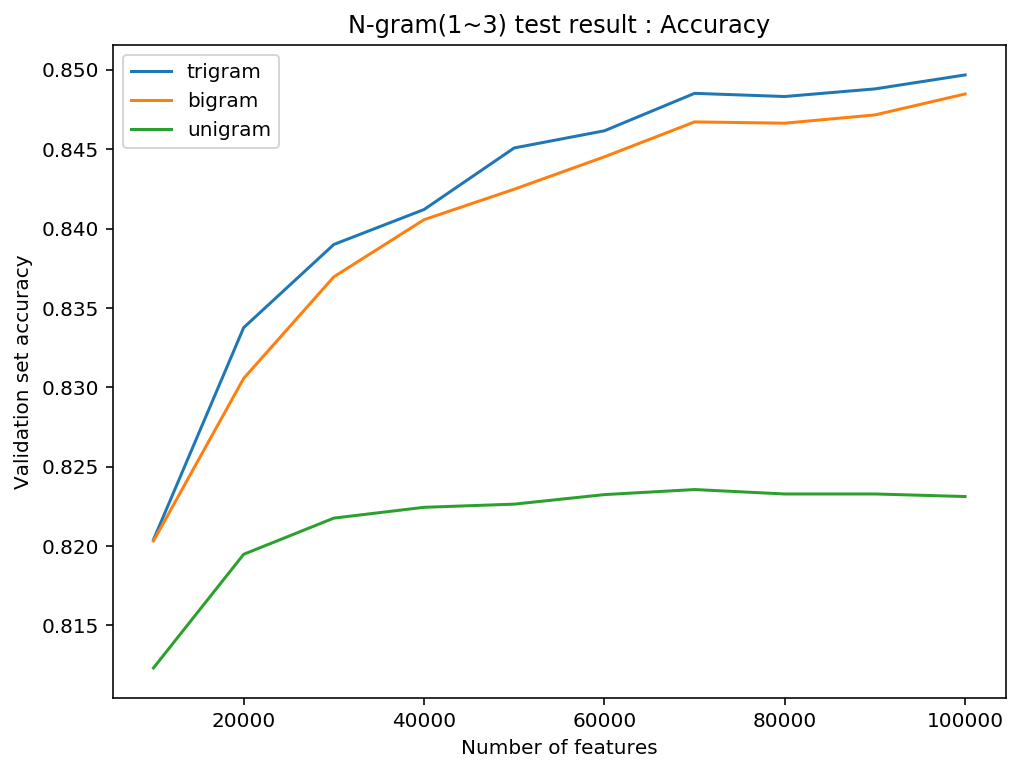

In [35]:
nfeatures_plot_tg = pd.DataFrame(
    feature_result_tg,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
nfeatures_plot_bg = pd.DataFrame(
    feature_result_bg,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
nfeatures_plot_ug = pd.DataFrame(
    feature_result_ug,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
plt.figure(figsize=(8, 6))
plt.plot(
    nfeatures_plot_tg.nfeatures,
    nfeatures_plot_tg.validation_accuracy,
    label='trigram')
plt.plot(
    nfeatures_plot_bg.nfeatures,
    nfeatures_plot_bg.validation_accuracy,
    label='bigram')
plt.plot(
    nfeatures_plot_ug.nfeatures,
    nfeatures_plot_ug.validation_accuracy,
    label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()
plt.show()

In [36]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):

    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0, 1]))
    confusion = pd.DataFrame(
        conmat,
        index=['negative', 'positive'],
        columns=['predicted_negative', 'predicted_positive'])
    print("accuracy score: {0:.2f}%".format(accuracy * 100))
    print("-" * 80)
    print("Confusion Matrix\n")
    print(confusion)
    print("-" * 80)
    print("Classification Report\n")
    print(
        classification_report(
            y_test, y_pred, target_names=['negative', 'positive']))

In [37]:
%%time

#Best Model so far
tg_cvec = CountVectorizer(max_features=100000, ngram_range=(1, 3))
tg_pipeline = Pipeline([('vectorizer', tg_cvec), ('classifier', lr)])
train_test_and_evaluate(tg_pipeline, x_train, y_train, x_validation,
                        y_validation)

accuracy score: 84.97%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative               10317                2122
positive                1636               10925
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

   negative       0.86      0.83      0.85     12439
   positive       0.84      0.87      0.85     12561

avg / total       0.85      0.85      0.85     25000

CPU times: user 13min 43s, sys: 45.1 s, total: 14min 28s
Wall time: 15min 13s


## Part 5: Tfidf vectorizer, model comparison, lexical approach

### Tfidf vs Count Vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(
    vectorizer=tvec, ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(
    vectorizer=tvec, ngram_range=(1, 3))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 81.39%
train and test time: 94.56s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 82.03%
train and test time: 106.39s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 82.19%
train and test time: 93.82s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 82.27%
train and test time: 106.06s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 82

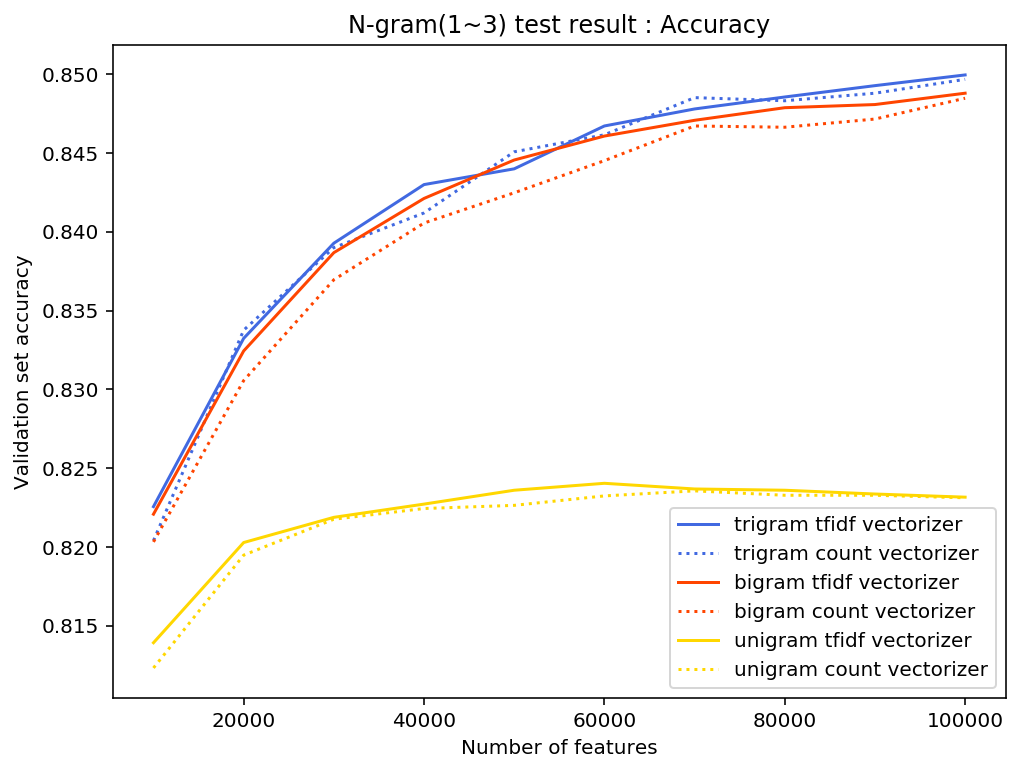

In [39]:
nfeatures_plot_tgt = pd.DataFrame(
    feature_result_tgt,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(
    feature_result_bgt,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(
    feature_result_ugt,
    columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
plt.figure(figsize=(8, 6))
plt.plot(
    nfeatures_plot_tgt.nfeatures,
    nfeatures_plot_tgt.validation_accuracy,
    label='trigram tfidf vectorizer',
    color='royalblue')
plt.plot(
    nfeatures_plot_tg.nfeatures,
    nfeatures_plot_tg.validation_accuracy,
    label='trigram count vectorizer',
    linestyle=':',
    color='royalblue')
plt.plot(
    nfeatures_plot_bgt.nfeatures,
    nfeatures_plot_bgt.validation_accuracy,
    label='bigram tfidf vectorizer',
    color='orangered')
plt.plot(
    nfeatures_plot_bg.nfeatures,
    nfeatures_plot_bg.validation_accuracy,
    label='bigram count vectorizer',
    linestyle=':',
    color='orangered')
plt.plot(
    nfeatures_plot_ugt.nfeatures,
    nfeatures_plot_ugt.validation_accuracy,
    label='unigram tfidf vectorizer',
    color='gold')
plt.plot(
    nfeatures_plot_ug.nfeatures,
    nfeatures_plot_ug.validation_accuracy,
    label='unigram count vectorizer',
    linestyle=':',
    color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

### Testing Multiple Algorithms

In [40]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = [
    "Logistic Regression", "Linear SVC",
    "LinearSVC with L1-based feature selection", "Multinomial NB",
    "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron",
    "Passive-Aggresive", "Nearest Centroid"
]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([('feature_selection',
               SelectFromModel(LinearSVC(penalty="l1", dual=False))),
              ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
]
zipped_clf = zip(names, classifiers)

tvec = TfidfVectorizer()


def classifier_comparator(vectorizer=tvec,
                          n_features=10000,
                          stop_words=None,
                          ngram_range=(1, 1),
                          classifier=zipped_clf):
    result = []
    vectorizer.set_params(
        stop_words=stop_words,
        max_features=n_features,
        ngram_range=ngram_range)
    for n, c in classifier:
        checker_pipeline = Pipeline([('vectorizer', vectorizer),
                                     ('classifier', c)])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy, tt_time = accuracy_summary(
            checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n, clf_accuracy, tt_time))
    return result


trigram_result = classifier_comparator(n_features=100000, ngram_range=(1, 3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
accuracy score: 85.00%
train and test time: 480.37s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
accuracy score: 85.08%
train and test time: 451.38s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=Non

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy score: 79.47%
train and test time: 504.35s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy score: 82.61%
train and test time: 451.06s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
accuracy score: 71.40%
train and test time: 485.29s
--------------------------------------------------------------------------------


In [41]:
models_df = pd.DataFrame(trigram_result)
models_df.columns = ['Model', 'Accuracy', 'Time']
models_df.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy,Time
2,LinearSVC with L1-based feature selection,0.85108,979.902920
1,Linear SVC,0.85076,451.379814
0,Logistic Regression,0.84996,480.368910
5,Ridge Classifier,0.84908,520.617074
8,Passive-Aggresive,0.82612,451.063243
3,Multinomial NB,0.81232,415.753369
4,Bernoulli NB,0.80116,369.660290
7,Perceptron,0.79468,504.346633
9,Nearest Centroid,0.71396,485.290520
6,AdaBoost,0.68300,2243.327512


### Voting Classifier
Uses the 3 best classifiers from above to vote on the result 

In [42]:
from sklearn.ensemble import VotingClassifier

# Top 3 Models
clf1 = RidgeClassifier()
clf2 = LinearSVC()
clf3 = LogisticRegression()

eclf = VotingClassifier(
    estimators=[('rcs', clf1), ('svc', clf2), ('lr', clf3)], voting='hard')

for clf, label in zip(
    [clf1, clf2, clf3, eclf],
    ['Ridge Classifier', 'Linear SVC', 'Logistic Regression', 'Ensemble']):
    checker_pipeline = Pipeline([('vectorizer',
                                  TfidfVectorizer(
                                      max_features=100000, ngram_range=(1,
                                                                        3))),
                                 ('classifier', clf)])
    print("Validation result for {}".format(label))
    print(clf)
    clf_accuracy, tt_time = accuracy_summary(
        checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
accuracy score: 84.90%
train and test time: 469.19s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
accuracy score: 85.08%
train and test time: 442.78s
--------------------------------------------------------------------------------
Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
       

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**83.65% is better than the first result we had so using the voting classifier is a good idea**

### Save Best classifier

In [60]:
from sklearn.externals import joblib
joblib.dump(checker_pipeline, 'best_classifier.pkl', compress=9)

['best_classifier.pkl']

In [69]:
# To load the classifier again
clf = joblib.load('best_classifier.pkl')

### Submission

In [55]:
# Create dataFrame from positive tweets and give them value 1 as a sentiment
data_sub = pd.DataFrame({
    "tweets": lines_submission
})
data_sub['tweets'].replace(
    regex=True, inplace=True, to_replace=r'<.*?>', value=r'')
data_sub['tweets'] = data_sub['tweets'].apply(lambda x: tweet_cleaner(x))
data_sub.head()

,tweets
0,sea doo pro sea scooter sports with the portab...
1,shucks well work all week so now can not come ...
2,cant stay away from bug thats my baby
3,no ma am lol im perfectly fine and not contagi...
4,whenever fall asleep watching the tv always wa...


In [59]:
X_sub = data_sub.tweets
pred_sub = clf.predict(X_sub) # 0.845

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [74]:
def create_submission(pred_sub):
    df_sub = pd.read_csv('./twitter-datasets/sample_submission.csv', index_col=0)
    df_sub['Prediction'] = pred_sub
    df_sub[df_sub['Prediction'] == 0] = -1
    df_sub.to_csv('submission.csv',index = 'Id')

create_submission(pred_sub)

### “positive rate CDF” and “positive frequency percent CDF”

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_features=10000)
cvec.fit(x_train)

neg_train = x_train[y_train == 0]
pos_train = x_train[y_train == 1]
neg_doc_matrix = cvec.transform(neg_train)
pos_doc_matrix = cvec.transform(pos_train)
neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)

from scipy.stats import hmean
from scipy.stats import norm


def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())


neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg, pos],
                             columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2[
    'pos_rate'] = term_freq_df2['positive'] * 1. / term_freq_df2['total']
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1. / term_freq_df2[
    'positive'].sum()
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean(
    [term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
thank,3181,36366,39547,0.919564,0.002940,0.993231,0.999886,0.996547
thanks,6753,60999,67752,0.900328,0.004932,0.991442,1.000000,0.995703
happy,7234,31721,38955,0.814299,0.002565,0.977450,0.999311,0.988259
follow,20898,70533,91431,0.771434,0.005703,0.965172,1.000000,0.982277
hey,4709,21921,26630,0.823169,0.001772,0.979471,0.985022,0.982239
good,23556,71167,94723,0.751317,0.005754,0.957751,1.000000,0.978420
haha,14478,42453,56931,0.745692,0.003432,0.955461,0.999992,0.977220
love,32697,89585,122282,0.732610,0.007243,0.949749,1.000000,0.974227
birthday,4606,19171,23777,0.806283,0.001550,0.975481,0.970087,0.972777
nice,5386,18492,23878,0.774437,0.001495,0.966181,0.964916,0.965548


In [46]:
pos_hmean = term_freq_df2.pos_normcdf_hmean

y_val_predicted_proba = []
for t in x_validation:
    hmean_scores = [pos_hmean[w] for w in t.split() if w in pos_hmean.index]
    if len(hmean_scores) > 0:
        prob_score = np.mean(hmean_scores)
    else:
        prob_score = np.random.random()
    y_val_predicted_proba.append(prob_score)

pred = [1 if t > 0.56 else 0 for t in y_val_predicted_proba]

from sklearn.metrics import accuracy_score
accuracy_score(y_validation, pred)

0.63204

**Not a very good estimator but better than a dummy one**

## Part 6: Doc2Vec